<a href="https://colab.research.google.com/github/Nawel-Bellil/AI---Deep-Learning--/blob/main/DL_Chapter_02_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this challenge, you will learn how to implement a face recognition model using a CNN. You can use this template to create an image classification model on any group of images by putting them in a folder and creating a class.

**Getting Images for this workshop**

You can download the data required for this workshop [here](https://thinkingneuron.com/wp-content/uploads/2020/10/Face-Images.zip)

The data contains cropped face images of 16 people divided into Training and testing. We will train the CNN model using the images in the Training folder and then test the model by using the unseen images from the testing folder, to check if the model is able to recognise the face number of the unseen images or not.

In [ ]:
# Specifying the folder where images are present
TrainingImagePath= 'Training Images'

from keras.preprocessing.image import ImageDataGenerator
# Understand more about ImageDataGenerator at the link below
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions of the original image, which leads to a better model,
#since it learns on the good and bad mix of images
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Printing class labels for each face
test_set.class_indices

NotADirectoryError: ignored

In [ ]:
#Creating lookup table for all faces
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

In the below code snippet, You will create a CNN model with

2 hidden layers of convolution
2 hidden layers of max pooling
1 layer of flattening
1 Hidden ANN layer
1 output layer with 16-neurons (one for each face)

You can increase or decrease the convolution, max pooling, and hidden ANN layers and the number of neurons in it.

Just keep in mind, the more layers/neurons you add, the slower the model becomes.

Also, when you have large amount of images, in the tune of 50K and above, then your laptop’ CPU might not be efficient to learn those many images. You will have to get a GPU enabled laptop, or use cloud services like AWS or Google Cloud.

In [ ]:
#Create CNN deep learning model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

#Initializing the Convolutional Neural Network
classifier= Sequential()

#STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels

classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

# STEP--2 MAX Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))

#ADDITIONAL LAYER of CONVOLUTION for better accuracy
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

# STEP--3 FLattening
classifier.add(Flatten())

# STEP--4 Fully Connected Neural Network
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

# Compiling the CNN
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
classifier.fit_generator(
                    training_set,
                    steps_per_epoch=30,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=10)

EndTime=time.time()
print("Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')


In [ ]:
#Making single predictions
import numpy as np
from keras.preprocessing import image

ImagePath='/content/sample_data/Face-Images.zip/Final Testing Images/face4/3face4.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)


print('Prediction is: ',ResultMap[np.argmax(result)])

The model has predicted this face correctly! You can try for other faces and see if it gets recognized. You can also add your own pics and train the model again.



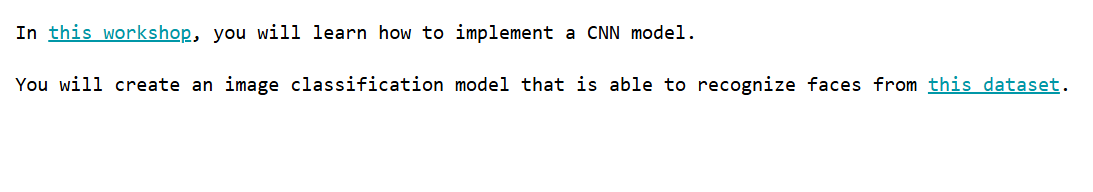
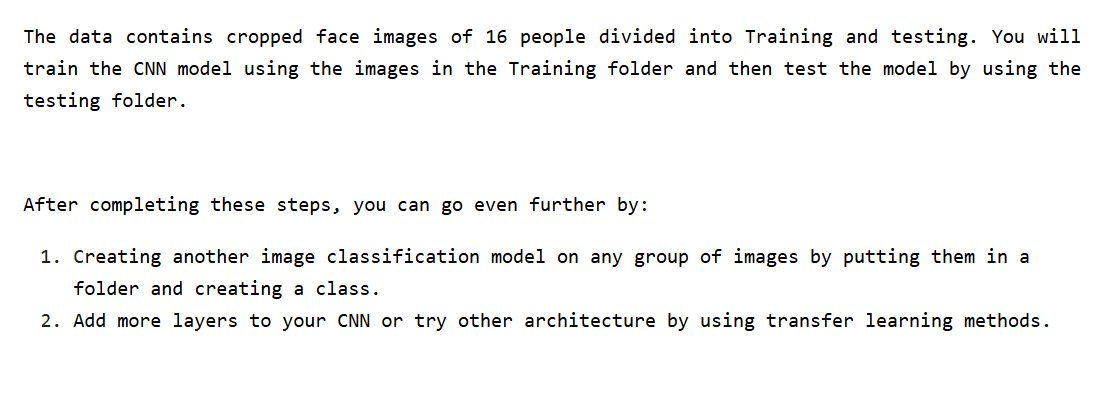
